In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
ROOT = "/mnt/stor/datasets/kaggle/rsna-intracranial-hemorrhage-detection/"
data_dir = os.path.join(ROOT, "stage_2_train_png/")
seg_dir = os.path.join(ROOT, "segmentation_masks_soft_pseudolabels2/")
masks = glob.glob(os.path.join(seg_dir, "*.png"))

In [3]:
labels_df = pd.read_csv(os.path.join(ROOT, "train_slices_with_2dc_kfold.csv"))

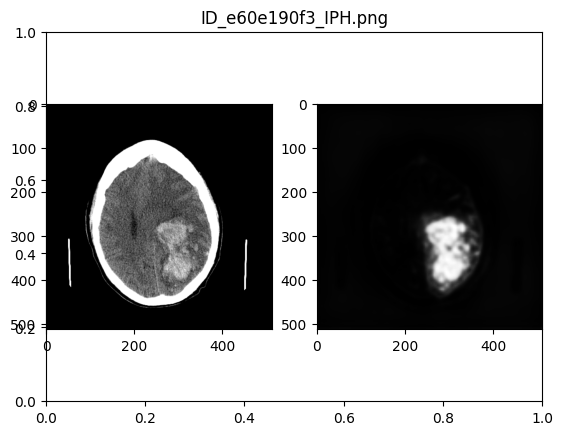

0.886 [[1 0 1 0 0 0]]


In [78]:
idx = np.random.choice(len(masks))
mask = cv2.imread(masks[idx], 0)
row = labels_df.loc[labels_df.SOPInstanceUID == "_".join(os.path.basename(masks[idx]).split(".")[0].split("_")[:2])]
img = cv2.imread(os.path.join(data_dir, row.filepath.values[0]), 0)

plt.title(os.path.basename(masks[idx]))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.show()

print(round(mask.max() / 255.0, 3), row[["any", "epidural", "intraparenchymal", "intraventricular", "subarachnoid", "subdural"]].values)


In [81]:
df = pd.read_csv(os.path.join(ROOT, "train_generated_segmentation_masks_kfold.csv"))
df = df.loc[df.filepath_2dc.isin(edh_df.filepath_2dc.tolist())]
df

,filepath_2dc,outer,fold,inner0,inner1,inner2,inner3,inner4,seg_filepath
121,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0016...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0017...
122,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0013...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0014...
123,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0011...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0012...
124,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0008...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0009...
125,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0009...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0010...
...,...,...,...,...,...,...,...,...,...
99851,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0009...,1,1,2,-1,0,2,2,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0010...
99856,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0010...,1,1,2,-1,0,2,2,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0011...
99909,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0005...,4,4,4,4,3,3,-1,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0006...
99914,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0007...,4,4,4,4,3,3,-1,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0008...


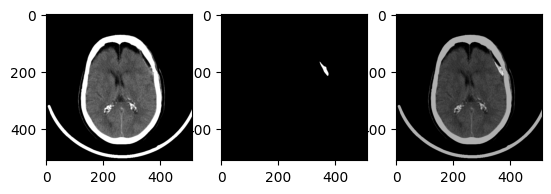

In [155]:
row = df.iloc[np.random.randint(len(df))]
img = cv2.imread(os.path.join(data_dir, row.seg_filepath), 0)
seg = cv2.imread(os.path.join(seg_dir, row.seg_filepath), 0)
seg_rescale = ((seg / seg.max()) * 255).astype("uint8")
overlay = 0.6 * img + 0.4 * seg_rescale
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(seg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(overlay, cmap="gray")
plt.show()